#Part 1:Data explorization

Load the dataframe in python environment

In [ ]:
#importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_loan_df = pd.read_csv('/content/train_loan.csv')
train_loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#Display all columns in the dataframe
train_loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Display the general information about the dataframe
train_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Display the shape of the dataframe
train_loan_df.shape

(614, 13)

In [ ]:
#display the statisstical information on the dataframe
train_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#drop unnessary column feature
#LoanID unwanted
train_loan_df=train_loan_df.drop('Loan_ID',axis=1)

#Part 2: Data Cleaning

Missing Value Handling :

In [ ]:
# Checking missing values
train_loan_df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
# Filling missing values using median imputation in numerical columns
fcol=['LoanAmount','Loan_Amount_Term','Credit_History']
for col in fcol:
  med_vals=train_loan_df[col].median()
  train_loan_df[col].fillna(med_vals, inplace=True)


<ipython-input-44-f8f33bfb050e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_df[col].fillna(med_vals, inplace=True)


In [ ]:
# Filling missing values using mode imputation in categorical columns
fcol=['Gender','Married','Dependents','Self_Employed']
for col in fcol:
  mod_vals=train_loan_df[col].mode()[0]
  train_loan_df[col].fillna(mod_vals, inplace=True)

<ipython-input-45-73d5dddbf882>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_df[col].fillna(mod_vals, inplace=True)


In [ ]:
# After imputation counting the missing values
train_loan_df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Outlier Detection

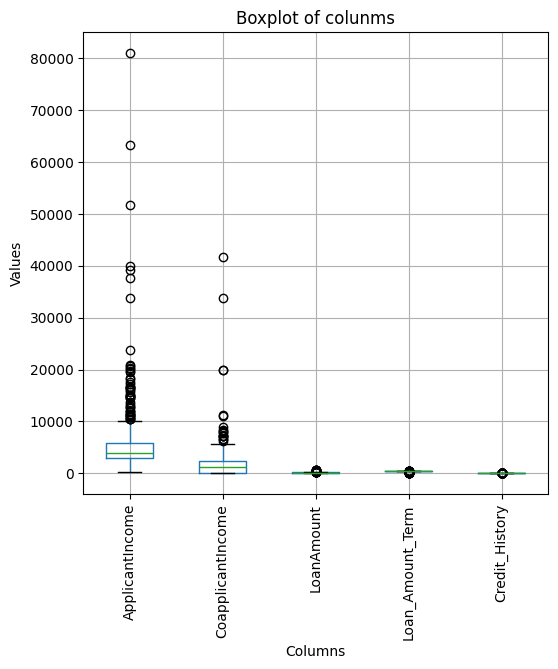

In [ ]:
# List out the columns to plot
col_plot = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(6,6))
train_loan_df[col_plot].boxplot()
plt.title('Boxplot of colunms')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of ApplicantIncome')

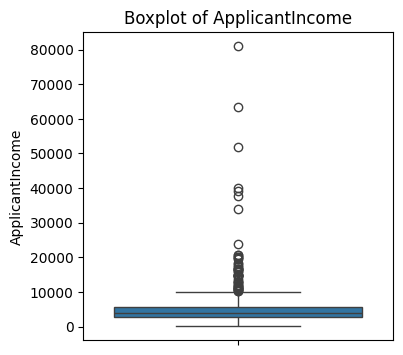

In [ ]:
# Boxplot of the ApplicantIncome
plt.figure(figsize=(4,4))
sns.boxplot(y=train_loan_df['ApplicantIncome'],data=train_loan_df)
plt.title('Boxplot of ApplicantIncome')

Text(0.5, 1.0, 'Boxplot of CoapplicantIncome')

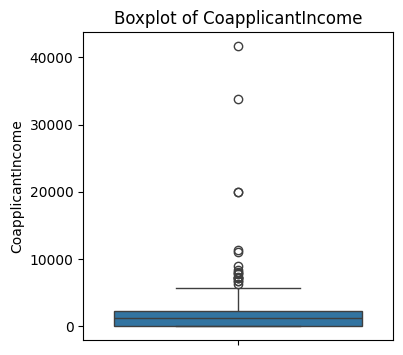

In [ ]:
# Boxplot of the CoapplicantIncome
plt.figure(figsize=(4,4))
sns.boxplot(y=train_loan_df['CoapplicantIncome'],data=train_loan_df)
plt.title('Boxplot of CoapplicantIncome')

Text(0.5, 1.0, 'Boxplot of LoanAmount')

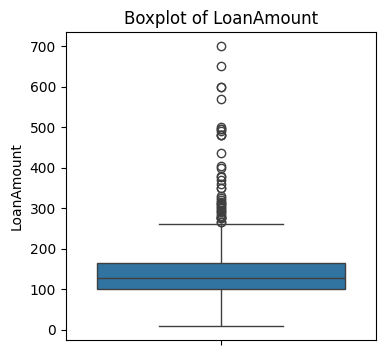

In [ ]:
# Boxplot of the LoanAmount
plt.figure(figsize=(4,4))
sns.boxplot(y=train_loan_df['LoanAmount'],data=train_loan_df)
plt.title('Boxplot of LoanAmount')

Text(0.5, 1.0, 'Boxplot of Loan_Amount_Term')

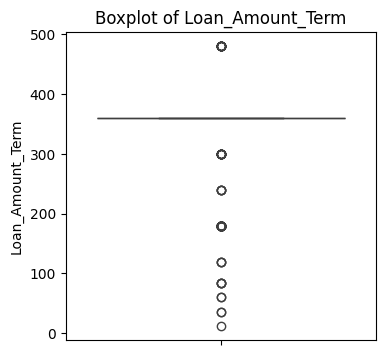

In [ ]:
# Boxplot of the Loan_Amount_Term
plt.figure(figsize=(4,4))
sns.boxplot(y=train_loan_df['Loan_Amount_Term'],data=train_loan_df)
plt.title('Boxplot of Loan_Amount_Term')

Text(0.5, 1.0, 'Boxplot of Credit_History')

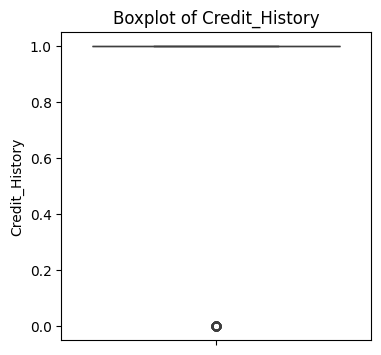

In [ ]:
# Boxplot of the Credit_History
plt.figure(figsize=(4,4))
sns.boxplot(y=train_loan_df['Credit_History'],data=train_loan_df)
plt.title('Boxplot of Credit_History')

In [ ]:
#Columns to apply the IQR method to
numeric_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

# Applying the IQR method to each specified column
for column in numeric_columns:
    Q1 = train_loan_df[column].quantile(0.25)
    Q3 = train_loan_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_loan_df[column] = np.where(train_loan_df[column] < lower_bound, lower_bound, train_loan_df[column])
    train_loan_df[column] = np.where(train_loan_df[column] > upper_bound, upper_bound, train_loan_df[column])

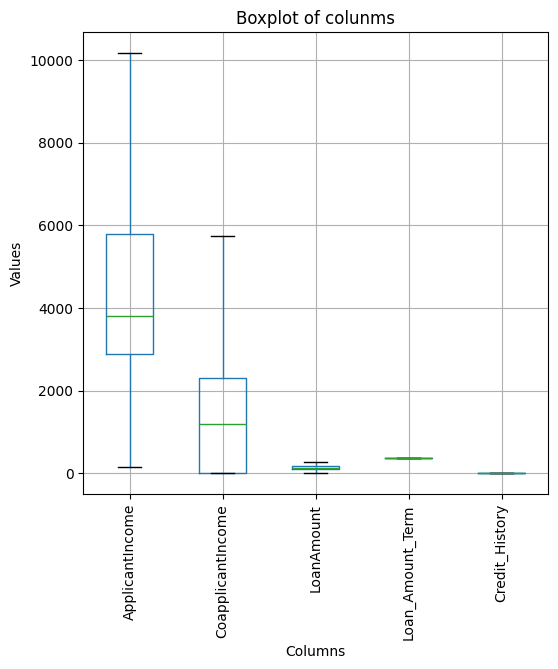

In [ ]:
# After outlier Treatment
col_plot = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(6,6))
train_loan_df[col_plot].boxplot()
plt.title('Boxplot of colunms')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

##Part 3: Data Visualization

Univariate Analysis

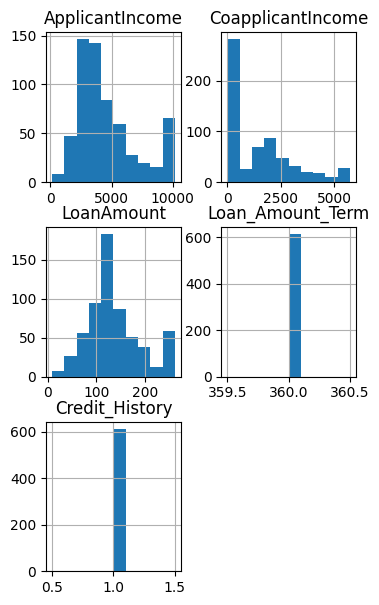

In [ ]:
# Histogram
train_loan_df.hist(figsize=(4,7))
plt.show()

<ipython-input-56-b3144a395346>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Loan_Status',data=train_loan_df,order=train_loan_df['Loan_Status'].value_counts().index,palette='Set2')


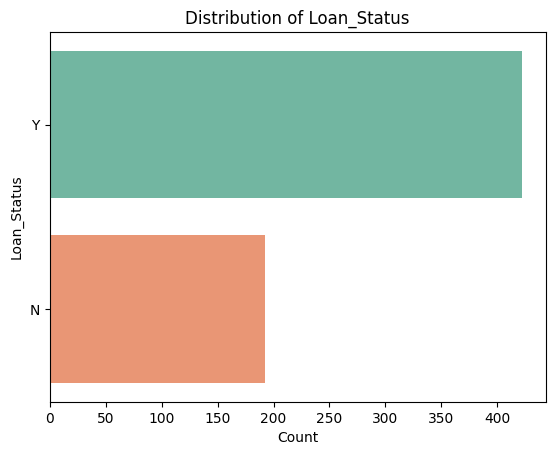

In [ ]:
#Distribution of Loan_Status
sns.countplot(y='Loan_Status',data=train_loan_df,order=train_loan_df['Loan_Status'].value_counts().index,palette='Set2')
plt.title('Distribution of Loan_Status')
plt.xlabel('Count')
plt.ylabel('Loan_Status')
plt.show()

<ipython-input-57-3dcfdf4e344f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Dependents',data=train_loan_df,order=train_loan_df['Dependents'].value_counts().index,palette='Set2')


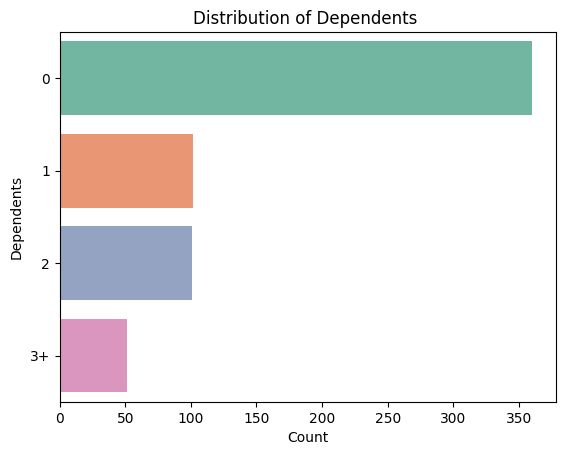

In [ ]:
#Distribution of Dependents
sns.countplot(y='Dependents',data=train_loan_df,order=train_loan_df['Dependents'].value_counts().index,palette='Set2')
plt.title('Distribution of Dependents ')
plt.xlabel('Count')
plt.ylabel('Dependents')
plt.show()

<ipython-input-58-46f1bbbc079c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Property_Area',data=train_loan_df,order=train_loan_df['Property_Area'].value_counts().index,palette='Set2')


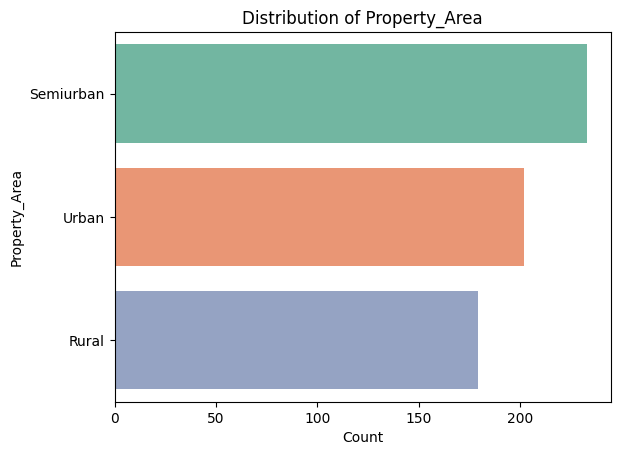

In [ ]:
#Distribution of Property_Area
sns.countplot(y='Property_Area',data=train_loan_df,order=train_loan_df['Property_Area'].value_counts().index,palette='Set2')
plt.title('Distribution of Property_Area')
plt.xlabel('Count')
plt.ylabel('Property_Area')
plt.show()

##Bivariate Analysis


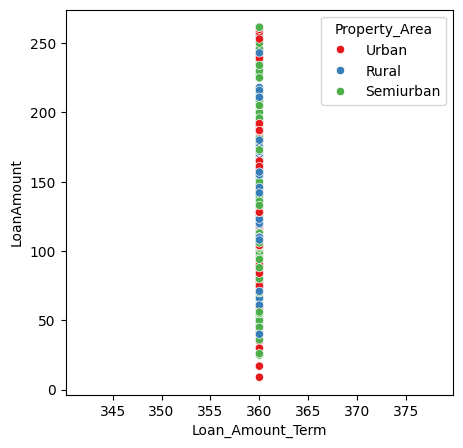

In [ ]:
# SCATTERPLOT
# Scatterplot for LoanAmount vs Loan_Amount_term
plt.figure(figsize=(5,5))
#sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount', data=train_loan_df,palette='green')
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=train_loan_df, hue='Property_Area', palette='Set1')

plt.show()

<ipython-input-60-ea8e14d90b71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='ApplicantIncome', x='Loan_Status', data=train_loan_df , palette='Set1')


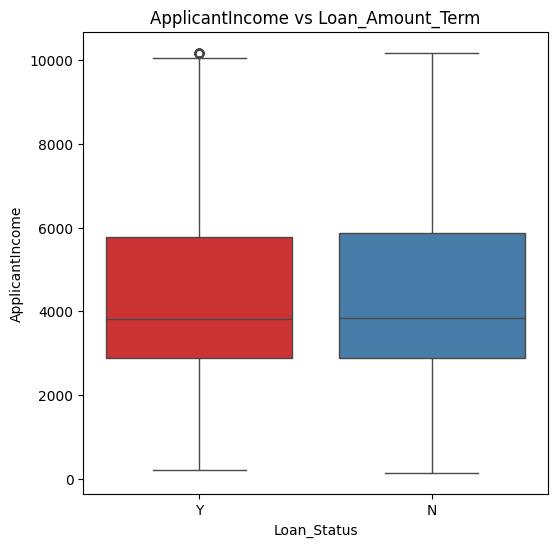

In [ ]:
# Boxplot
# Boxplot for ApplicantIncome vs Loan_Amount_Term
plt.figure(figsize=(6,6))
sns.boxplot(y='ApplicantIncome', x='Loan_Status', data=train_loan_df , palette='Set1')
plt.title('ApplicantIncome vs Loan_Amount_Term')
plt.show()


<ipython-input-61-bb1f3804b319>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='LoanAmount', x='Loan_Status', data=train_loan_df , palette='Set3')


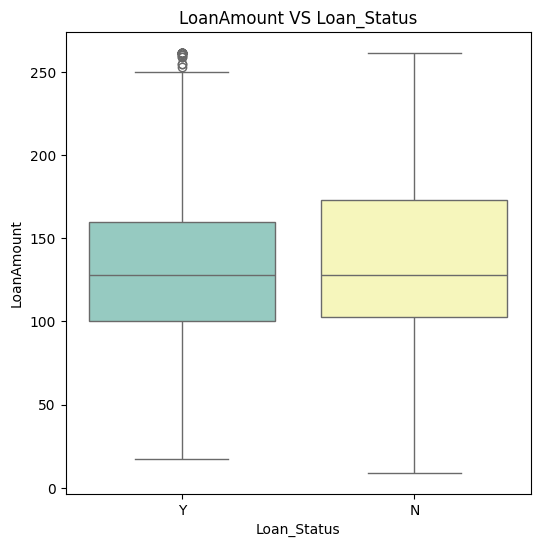

In [ ]:
# Boxplot
# Boxplot for  Loan_Amount_Term vs Loan_Status
plt.figure(figsize=(6,6))
sns.boxplot(y='LoanAmount', x='Loan_Status', data=train_loan_df , palette='Set3')
plt.title('LoanAmount VS Loan_Status')
plt.show()

## ENCODING :

Mapping

In [ ]:
#map the values Y and N into 0 and 1
train_loan_df['Loan_Status']=train_loan_df['Loan_Status'].map({'Y':1,'N':0})
#Replace the Dependents column value 3+ into 3
train_loan_df['Dependents']=train_loan_df['Dependents'].replace('3+',3,inplace=True)

<ipython-input-62-efc4b70d8d83>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_df['Dependents']=train_loan_df['Dependents'].replace('3+',3,inplace=True)


In [ ]:
#encoding the categorical columns using label encoding
#import label encoding
from sklearn.preprocessing import LabelEncoder
#the categorical columns to encode
cate_col= ['Gender','Married','Education','Self_Employed']
label_encoder={}
for col in cate_col:
  Label=LabelEncoder()
  train_loan_df[col]=Label.fit_transform(train_loan_df[col])
  label_encoder[col]=Label
train_loan_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,None,0,0,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,1,1,None,0,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,None,0,1,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,1,1,None,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,None,0,0,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
# Apply one-hot encoding to Property_Area,Dependents
train_loan_df = pd.get_dummies(train_loan_df, columns=['Property_Area','Dependents'])

# Display the first few rows of the resulting DataFrame
train_loan_df.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,True
1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,True
4,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,True


In [ ]:
# Convert True/False columns to 1/0
train_loan_df = train_loan_df.astype('int64')

# Display the first few rows again
train_loan_df.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0,128,360,1,1,0,0,1
1,1,1,0,0,4583,1508,128,360,1,0,1,0,0
2,1,1,0,1,3000,0,66,360,1,1,0,0,1
3,1,1,1,0,2583,2358,120,360,1,1,0,0,1
4,1,0,0,0,6000,0,141,360,1,1,0,0,1


In [ ]:
# Importing  train-test split
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
x = train_loan_df.drop('Loan_Status', axis=1)
y = train_loan_df['Loan_Status']

In [ ]:
print(x)

     Gender  Married  Education  Self_Employed  ApplicantIncome  \
0         1        0          0              0             5849   
1         1        1          0              0             4583   
2         1        1          0              1             3000   
3         1        1          1              0             2583   
4         1        0          0              0             6000   
..      ...      ...        ...            ...              ...   
609       0        0          0              0             2900   
610       1        1          0              0             4106   
611       1        1          0              0             8072   
612       1        1          0              0             7583   
613       0        0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0         128               360               1   
1                 1508         128               36

In [ ]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_xtrain=scaler.fit_transform(x_train)
Scaled_xtest=scaler.fit_transform(x_test)

In [ ]:
x_train=Scaled_xtrain
x_test=Scaled_xtest

##DIFFERENT ENSEMBLE LEARNING TECHNIQUES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#AVERAGING
model1_avg=DecisionTreeClassifier()
model2_avg=KNeighborsClassifier()
model3_avg=LogisticRegression()

In [ ]:
model1_avg.fit(x_train,y_train)
model2_avg.fit(x_train,y_train)
model3_avg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predict
pred1_avg = model1_avg.predict_proba(x_test)
pred2_avg = model2_avg.predict_proba(x_test)
pred3_avg = model3_avg.predict_proba(x_test)

In [ ]:
pred3_avg

array([[0.16540879, 0.83459121],
       [0.17033157, 0.82966843],
       [0.34713118, 0.65286882],
       [0.41382441, 0.58617559],
       [0.26680186, 0.73319814],
       [0.33075545, 0.66924455],
       [0.17173199, 0.82826801],
       [0.30258266, 0.69741734],
       [0.41949598, 0.58050402],
       [0.28197408, 0.71802592],
       [0.14544528, 0.85455472],
       [0.34145917, 0.65854083],
       [0.19315093, 0.80684907],
       [0.37860749, 0.62139251],
       [0.23510672, 0.76489328],
       [0.26950609, 0.73049391],
       [0.47597234, 0.52402766],
       [0.20635369, 0.79364631],
       [0.15663691, 0.84336309],
       [0.14873706, 0.85126294],
       [0.34112109, 0.65887891],
       [0.14729108, 0.85270892],
       [0.17667122, 0.82332878],
       [0.17387585, 0.82612415],
       [0.27701967, 0.72298033],
       [0.39490515, 0.60509485],
       [0.38161308, 0.61838692],
       [0.28734067, 0.71265933],
       [0.40364575, 0.59635425],
       [0.31678875, 0.68321125],
       [0.

In [ ]:
# Average probabilities
final_pred_proba = (pred1_avg + pred2_avg + pred3_avg) / 3

# Get final predicted classes
final_pred_proba

array([[0.12180293, 0.87819707],
       [0.05677719, 0.94322281],
       [0.64904373, 0.35095627],
       [0.53794147, 0.46205853],
       [0.62226729, 0.37773271],
       [0.11025182, 0.88974818],
       [0.057244  , 0.942756  ],
       [0.23419422, 0.76580578],
       [0.67316533, 0.32683467],
       [0.62732469, 0.37267531],
       [0.04848176, 0.95151824],
       [0.31381972, 0.68618028],
       [0.06438364, 0.93561636],
       [0.59286916, 0.40713084],
       [0.27836891, 0.72163109],
       [0.15650203, 0.84349797],
       [0.29199078, 0.70800922],
       [0.2021179 , 0.7978821 ],
       [0.18554564, 0.81445436],
       [0.04957902, 0.95042098],
       [0.5803737 , 0.4196263 ],
       [0.11576369, 0.88423631],
       [0.05889041, 0.94110959],
       [0.19129195, 0.80870805],
       [0.22567322, 0.77432678],
       [0.59830172, 0.40169828],
       [0.26053769, 0.73946231],
       [0.16244689, 0.83755311],
       [0.33454858, 0.66545142],
       [0.50559625, 0.49440375],
       [0.

WEIGHTED AVERAGING

In [ ]:
model1_wg=DecisionTreeClassifier()
model2_wg=KNeighborsClassifier()
model3_wg=LogisticRegression()

In [ ]:
model1_wg.fit(x_train,y_train)
model2_wg.fit(x_train,y_train)
model3_wg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred1_wg=model1_wg.predict(x_test)
pred2_wg=model2_wg.predict(x_test)
pred3_wg=model3_wg.predict(x_test)

In [ ]:
final_pred_wg=(pred1_wg*0.3+pred2_wg*0.3+pred3_wg*0.4)
final_pred_wg

array([1. , 1. , 0.4, 0.7, 0.4, 1. , 1. , 0.7, 0.4, 0.4, 1. , 0.7, 1. ,
       0.7, 0.4, 1. , 1. , 1. , 1. , 1. , 0.7, 1. , 1. , 1. , 1. , 0.7,
       1. , 1. , 0.7, 0.7, 0.7, 1. , 1. , 0.7, 0.4, 0.7, 0.7, 1. , 1. ,
       0.4, 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 0.7, 0.7, 0.7, 1. , 0.7,
       0.7, 1. , 0.7, 0.4, 1. , 1. , 0.7, 1. , 1. , 1. , 1. , 1. , 0.7,
       0.4, 1. , 1. , 0.7, 1. , 0.7, 0.7, 1. , 1. , 1. , 1. , 0.7, 1. ,
       1. , 1. , 0.7, 0.7, 0.7, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       0.7, 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 0.7, 1. , 1. , 0.3, 1. ,
       1. , 0.7, 1. , 1. , 1. , 1. , 1. , 0.7, 0.7, 1. , 0.7, 0.3, 1. ,
       1. , 0.7, 0.7, 0.7, 1. , 1. , 1. , 0.7, 1. , 1. , 0.7, 0.7, 1. ,
       0.7, 1. , 0.4, 1. , 1. , 1. , 0.7, 1. , 1. , 1. , 1. , 1. , 0.7,
       1. , 0.7, 0.4, 1. , 1. , 1. , 0.6, 1. , 1. , 1. , 0.7, 1. , 0.7,
       1. , 0.7, 1. , 0.7, 0.7, 0.7, 0.7, 1. , 1. , 1. , 0.7, 0.7, 0.7,
       1. , 0.7, 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 0.4, 1. , 1.

MAX VOTING/VOTING CLASSIFIER:

In [ ]:
import statistics as st
model1=DecisionTreeClassifier()
model2=KNeighborsClassifier()
model3=LogisticRegression()

In [ ]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

LogisticRegression()

In [ ]:

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [ ]:
final_pred=np.array([])
for i in range(0,len(x_test)):
  final_pred=np.append(final_pred,st.mode([pred1[i],pred2[i],pred3[i]]))
  print(final_pred)

[1.]
[1. 1.]
[1. 1. 0.]
[1. 1. 0. 1.]
[1. 1. 0. 1. 0.]
[1. 1. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 

In [ ]:
from sklearn.ensemble import VotingClassifier
model1=DecisionTreeClassifier(random_state=42)
model2=KNeighborsClassifier()
model3=LogisticRegression(random_state=1)
model=VotingClassifier(estimators=[('dt',model1),('knn',model2),('lr',model3)],voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6354679802955665

ADVANCED ENSEMBLE TECHNIQUES


In [ ]:
#BAGGING:
#Using Logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

bag_model = BaggingClassifier(LogisticRegression(),n_estimators=100)

bag_model.fit(x_train, y_train)


BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)

In [ ]:
model.score(x_test,y_test)

0.6354679802955665

In [ ]:
#Using Decisiontree
tree1=DecisionTreeClassifier(max_depth=3,random_state=42)


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(estimator=tree1,n_estimators=5,max_samples=50,bootstrap=True)

In [ ]:
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   random_state=42),
                  max_samples=50, n_estimators=5)

In [ ]:
print(accuracy_score(y_test,bagging.predict(x_test)))
print(bagging.score(x_train,y_train))
print(bagging.score(x_test,y_test))

0.645320197044335
0.6642335766423357
0.645320197044335


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.645320197044335

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelog=GradientBoostingClassifier(learning_rate=0.01,n_estimators=5,random_state=42)
modelog.fit(x_train,y_train)
modelog.score(x_test,y_test)

0.645320197044335

In [ ]:
# XGBOOSTER CLASSIFIER:
from xgboost import XGBClassifier
modelxg = XGBClassifier(random_state=42)
modelxg.fit(x_train, y_train)
modelxg.score(x_test, y_test)

0.6354679802955665

##HYPERPARAMETER TUNING

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Bagging model (use 'estimator' instead of 'base_estimator')
model = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [3, 5, 7],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found by GridSearchCV: {'estimator__max_depth': 7, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 10}
